# Lösungsvorschlag 4 - Autoencoder

### Importiere Bibliotheken

In [16]:
import numpy as np

from keras.models import Sequential, load_model
from keras import losses
from keras import optimizers
from keras.layers import Conv2D, InputLayer, Conv2DTranspose
from keras.layers import Dense, Dropout, Flatten, Reshape, MaxPool2D

from keras_tqdm import TQDMNotebookCallback
import matplotlib.pyplot as plt

import codefestutils

### Lade Bilder

In [17]:
n = 1000
X,Y = codefestutils.LoadFaces(n)
print(X.shape)
width = X.shape[2]
height = X.shape[1]

loaded 568 women
loaded 432 men
(1000, 224, 184, 1)


### Definition der Anzahl der Neuronen in der kleinsten Zwischenschicht

In [18]:
nLatentSpace = 5

### Definiere das Modell

In [19]:
encoder = Sequential()
encoder.add(InputLayer(input_shape=(height, width, 1)))
encoder.add(Conv2D(12, kernel_size=(3, 3), activation='relu', padding='same'))
encoder.add(MaxPool2D(pool_size=(2, 2)))
encoder.add(Conv2D(12, kernel_size=(3, 3), activation='relu', padding='same'))
encoder.add(MaxPool2D(pool_size=(2, 2)))
encoder.add(Flatten())
encoder.add(Dense(nLatentSpace, activation='linear'))
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 184, 1)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 184, 12)      120       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 92, 12)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 92, 12)       1308      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 46, 12)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30912)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 154565    
Total para

In [20]:
decoder = Sequential()
decoder.add(InputLayer(input_shape=(nLatentSpace,)))
decoder.add(Dense(82432, activation='relu'))
decoder.add(Reshape((112, 92, 8)))
decoder.add(Conv2DTranspose(12, kernel_size=(3, 3), activation='relu', padding='same', strides=2))
decoder.add(Conv2DTranspose(12, kernel_size=(3, 3), activation='relu', padding='same', strides=1))
decoder.add(Conv2DTranspose(1, kernel_size=(3, 3), activation='sigmoid', padding='same', strides=1))
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 82432)             494592    
_________________________________________________________________
reshape_2 (Reshape)          (None, 112, 92, 8)        0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 224, 184, 12)      876       
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 224, 184, 12)      1308      
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 224, 184, 1)       109       
Total params: 496,885
Trainable params: 496,885
Non-trainable params: 0
_________________________________________________________________


In [21]:
model = Sequential()
model.add(encoder)
model.add(decoder)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 5)                 155993    
_________________________________________________________________
sequential_5 (Sequential)    (None, 224, 184, 1)       496885    
Total params: 652,878
Trainable params: 652,878
Non-trainable params: 0
_________________________________________________________________


### Konfiguriere den Lernalgorithmus

In [ ]:
model.compile(optimizer=optimizers.Adam(lr=0.01), loss=losses.mean_squared_error)

### Lass dein Modell lernen

In [ ]:
history = model.fit(X, X, validation_split=0.10, batch_size=100, epochs=10, verbose=0, callbacks=[TQDMNotebookCallback()])

### Testphase

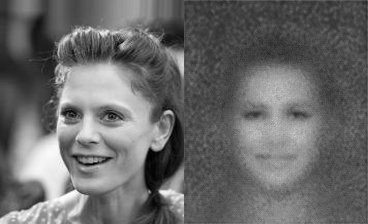

In [10]:
idx = 1
output = model.predict(X[idx:idx+1])[0]
codefestutils.ShowImage(np.concatenate((X[idx], output), axis=1))

### Plote die KPIs

dict_keys(['loss', 'val_loss'])


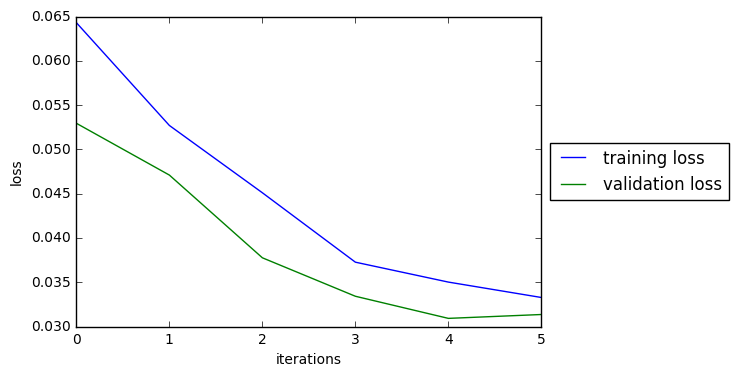

In [11]:
print(history.history.keys())
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

### Beispiel Featurevektor

In [12]:
idx = 5
encoder.predict(X[idx:idx+1])[0]

array([-19.176258,  17.888418, -35.29763 , -18.474865,  19.908554],
      dtype=float32)

### Spiele herum und generiere zufällige Gesichter

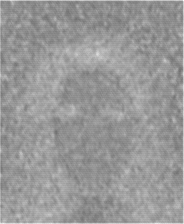

In [15]:
random = np.random.rand(1, nLatentSpace) * 20 - 10
codefestutils.ShowImage(decoder.predict(random)[0])